In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_revision = 'Revision'

In [3]:
def get_table(base_path, report_name, entry):
    table = pd.read_csv(base_path + '/Sequential/' + report_name + '.txt')
    
    for i in range(1,5):
        index = pow(2,i)
        table[str(index)] = pd.read_csv(base_path + '/OpenMP/' + str(index) + '/' + report_name + '.txt')[entry]
    
    table['TBB'] = pd.read_csv(base_path + '/TBB/' + report_name + '.txt')[entry]
    return table.to_numpy()

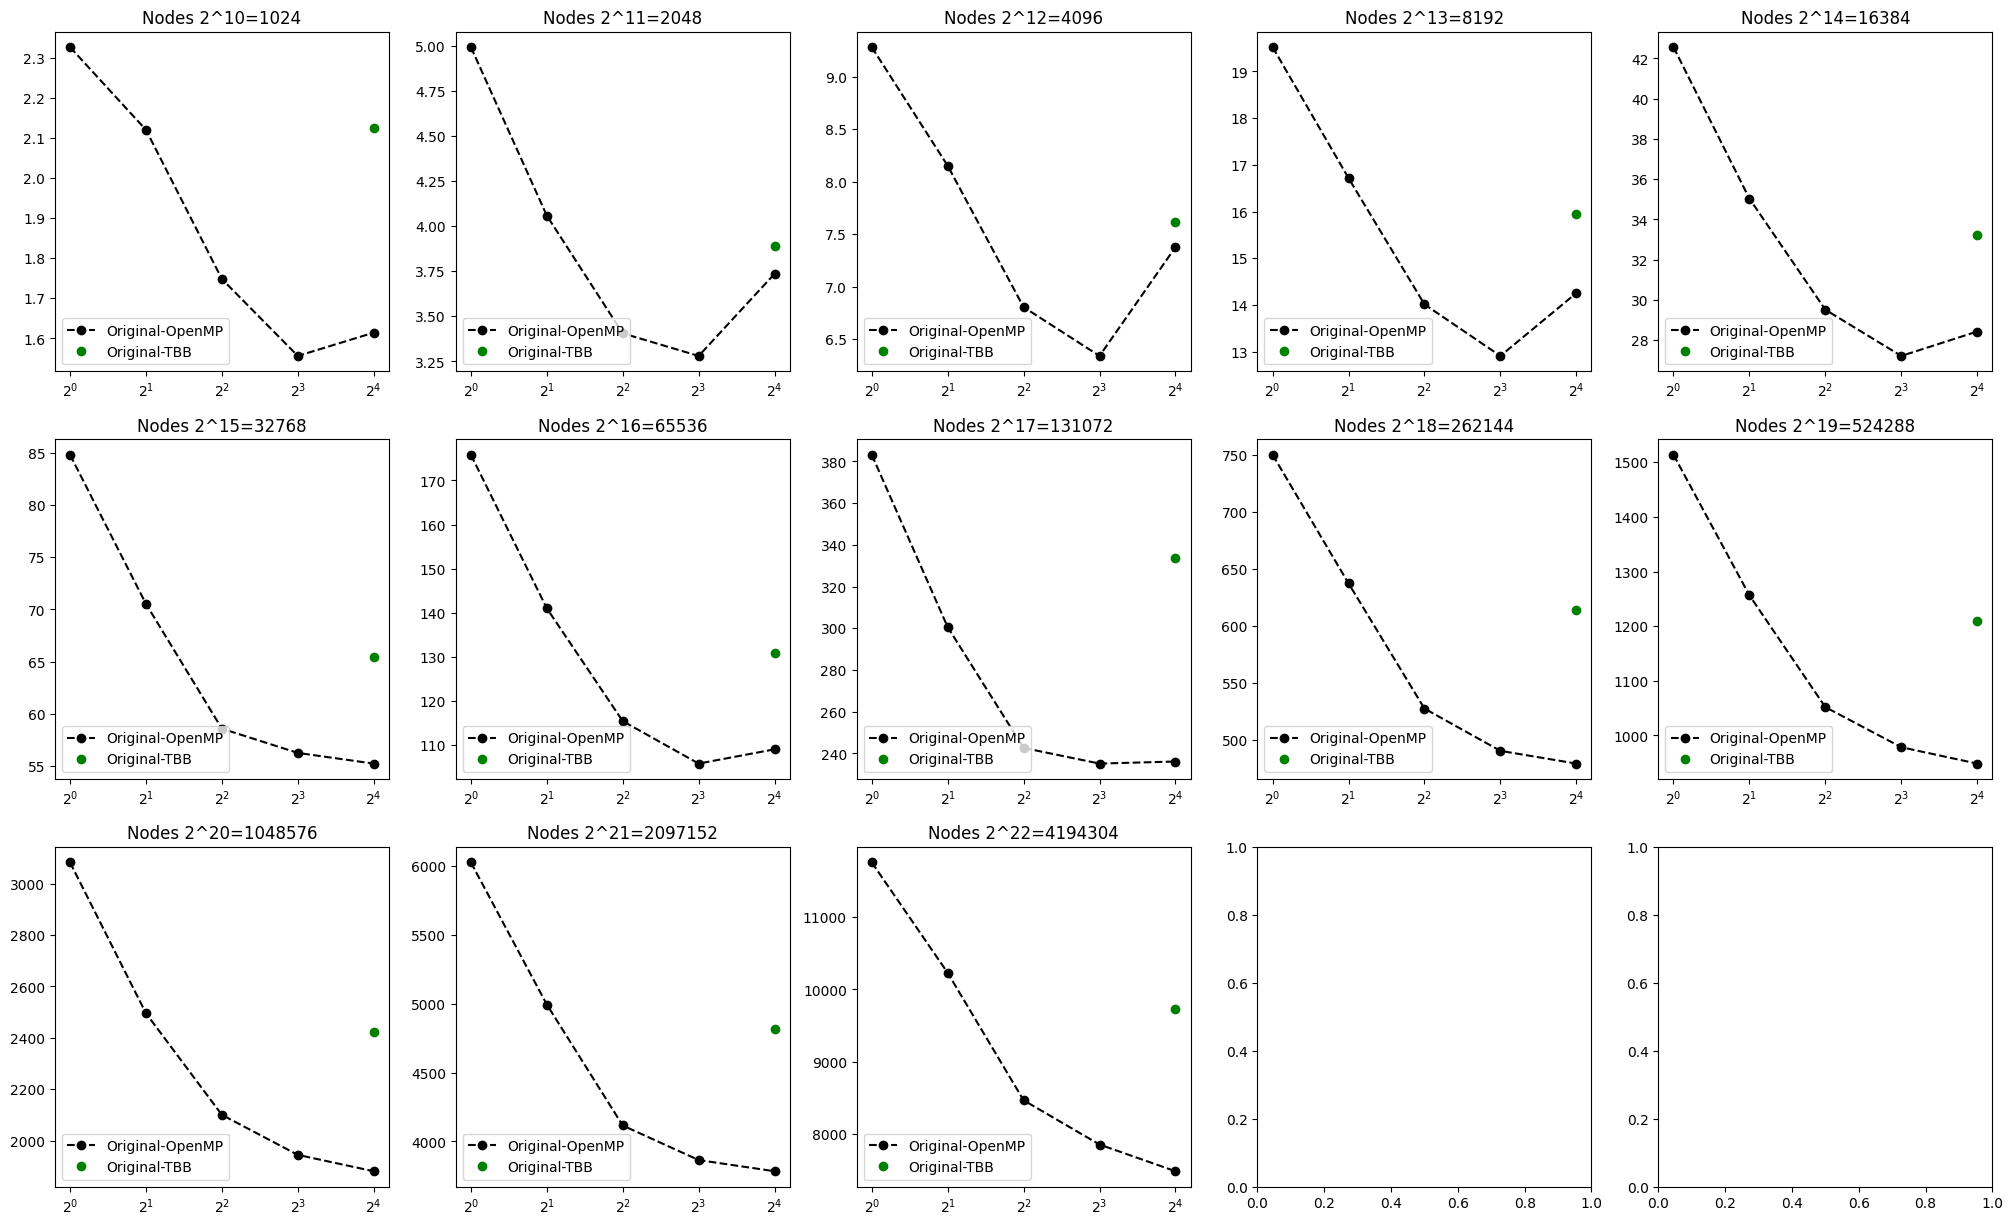

In [4]:
fix, axs = plt.subplots(3, 5, figsize=(25, 15))

res_revision = get_table(path_revision, 'report_Constrained_Builder', 'TotalTime')

for i in range(5):
    axs[0,i].set_title('Nodes 2^' + str(10+i) + '=' + str(pow(2,10+i)))


    axs[0,i].plot([1,2,4,8,16], res_revision[i, 1:6], '--ko')
    axs[0,i].plot(16, res_revision[i, 6], 'go')


    axs[0,i].set_xscale('log', base=2)
    axs[0,i].legend(['Original-OpenMP', 'Original-TBB', 'Revision-OpenMP', 'Revision-Original-TBB'], loc='lower left')

for i in range(5):
    axs[1,i].set_title('Nodes 2^' + str(15+i) + '=' + str(pow(2,15+i)))


    axs[1,i].plot([1,2,4,8,16],res_revision[5+i, 1:6], '--ko')
    axs[1,i].plot(16, res_revision[i+5, 6], 'go')


    axs[1,i].set_xscale('log', base=2)
    axs[1,i].legend(['Original-OpenMP', 'Original-TBB', 'Revision-OpenMP', 'Revision-Original-TBB'], loc='lower left')

for i in range(3):
    axs[2,i].set_title('Nodes 2^' + str(20+i) + '=' + str(pow(2,20+i)))


    axs[2,i].plot([1,2,4,8,16],res_revision[10+i, 1:6], '--ko')
    axs[2,i].plot(16, res_revision[i+10, 6], 'go')


    axs[2,i].set_xscale('log', base=2)
    axs[2,i].legend(['Original-OpenMP', 'Original-TBB', 'Revision-OpenMP', 'Revision-Original-TBB'], loc='lower left')